In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as linregress


In [2]:
csv_path = "Resources/methane.csv"
co_allyears_df = pd.read_csv(csv_path)
#co_allyears_df.head()
co_allyears_df.columns

Index(['Unnamed: 0', 'state_code', 'county_code', 'site_number',
       'parameter_code', 'poc', 'latitude', 'longitude', 'datum', 'parameter',
       'sample_duration', 'pollutant_standard', 'date_local',
       'units_of_measure', 'event_type', 'observation_count',
       'observation_percent', 'validity_indicator', 'arithmetic_mean',
       'first_max_value', 'first_max_hour', 'aqi', 'method_code', 'method',
       'local_site_name', 'site_address', 'state', 'county', 'city',
       'cbsa_code', 'cbsa', 'date_of_last_change', 'year'],
      dtype='object')

In [30]:
#co_allyears_df.drop(columns = ["poc" , "parameter_code" , "method" , "sample_duration" , "validity_indicator" ,"event_type", "pollutant_standard" , 
                               #"observation_percent" ,"" ])

co_allyears_df.drop(columns = ['county_code', 'site_number',
        'parameter_code', 'poc', 'latitude', 'longitude', 'datum', 'parameter',
        'sample_duration', 'pollutant_standard', 'event_type', 'observation_count',
        'observation_percent', 'validity_indicator',
        'first_max_value', 'first_max_hour', 'aqi', 'method_code', 'method',
        'local_site_name','cbsa_code', 'cbsa', 'date_of_last_change', 'site_address', 'state'])

,Unnamed: 0,state_code,date_local,units_of_measure,arithmetic_mean,county,city,year
0,551259,6,12/31/09,Parts per billion Carbon,2136.363636,Santa Clara,San Jose,2009
1,551260,6,12/30/09,Parts per billion Carbon,1992.173913,Santa Clara,San Jose,2009
2,551261,6,12/29/09,Parts per billion Carbon,2262.727273,Santa Clara,San Jose,2009
3,551262,6,12/28/09,Parts per billion Carbon,2267.391304,Santa Clara,San Jose,2009
4,551263,6,12/27/09,Parts per billion Carbon,2117.727273,Santa Clara,San Jose,2009
...,...,...,...,...,...,...,...,...
37963,589222,6,1/5/18,Parts per billion Carbon,2004.566667,Tehama,Not in a city,2018
37964,589223,6,1/4/18,Parts per billion Carbon,2107.541667,Tehama,Not in a city,2018
37965,589224,6,1/3/18,Parts per billion Carbon,1931.933333,Tehama,Not in a city,2018
37966,589225,6,1/2/18,Parts per billion Carbon,1888.341667,Tehama,Not in a city,2018


<AxesSubplot:xlabel='year'>

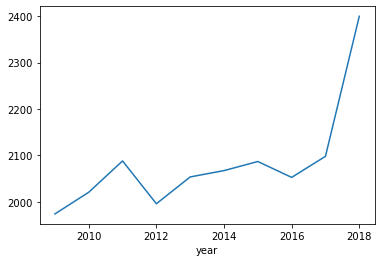

In [6]:
co_allyears_df.groupby('year').mean()['arithmetic_mean'].plot(kind='line')

In [7]:
county_sort_df = co_allyears_df.groupby(['county', 'year'])['arithmetic_mean'].mean()
county_sort_df.head(30)

county        year
Alameda       2009    1972.432742
              2010    1984.470225
              2011    2068.721784
              2012    2031.734747
              2013    2013.124087
Contra Costa  2009    1960.236809
              2010    1957.418540
              2011    1997.277519
Fresno        2010    2088.701996
              2011    2024.121847
              2012    2029.242910
              2013    2043.571543
              2014    2173.867209
              2015    2073.544042
              2016    2075.731195
              2017    2076.867426
              2018    3139.747092
Kern          2010    2075.378197
              2011    2145.773872
              2012    2114.884903
              2013    2163.850659
              2014    2149.432409
              2015    2193.885532
              2016    2145.280715
              2017    2166.788654
              2018    2203.998324
Madera        2010    2270.400397
              2011    2287.845440
              2012    2207.66

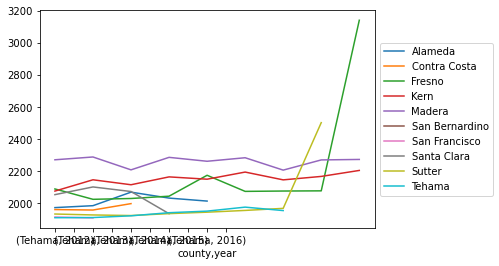

In [8]:
#ax = county_sort_df.plot(kind='line', x= 'year', y= 'arithmetic_mean')
fig, ax = plt.subplots()
county_sort_df.groupby('county').plot(x='year', y='arithmetic_mean', ax=ax, legend=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
#need to clean up above visualization
#value in breaking out percentage of each county of overall output?

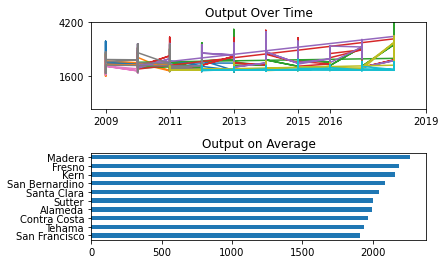

In [29]:
#fig, (ax1, ax2) = plt.subplots(1, 2)

#co_allyears_df.groupby('county').plot(x='year', y='arithmetic_mean', ax=ax1, legend=False)
#co_allyears_df.groupby('county')['arithmetic_mean'].mean().sort_values().plot(kind='barh', ax=ax2)



fig, (ax1, ax2) = plt.subplots(2, 1)
co_allyears_df.groupby('county').plot(x='year', y='arithmetic_mean', ax=ax1, legend=False)
ax1.set_ylim((0,5))
ax1.yaxis.set_ticks([1600, 4200])
ax1.xaxis.set_ticks([2009,2011, 2013, 2015, 2016, 2019])
ax1.xaxis.set_label_text("")
ax1.set_title("Output Over Time")

co_allyears_df.groupby('county')['arithmetic_mean'].mean().sort_values().plot(kind='barh', ax=ax2)
ax2.yaxis.set_label_text("")
ax2.set_title("Output on Average")
fig.subplots_adjust(hspace=0.5)

In [ ]:
#above came from 